<a href="https://colab.research.google.com/github/HenryJi529/ColabNotebooks/blob/main/PracticeSklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Scikit-Learn

In [ ]:
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X,y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)   

(442, 10)
(442,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

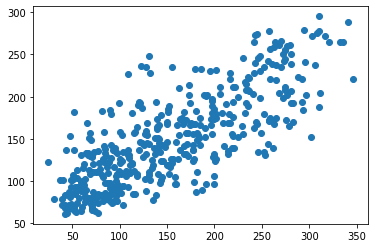

In [ ]:
model = KNeighborsRegressor()

model.fit(X,y)
y_predict = model.predict(X)

plt.scatter(y, y_predict)

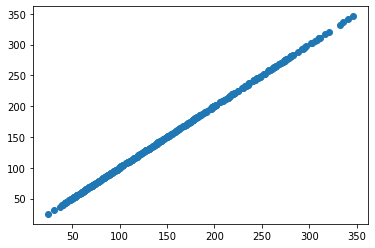

In [ ]:
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

pipeline.fit(X,y)
y_predict = pipeline.predict(X)

plt.scatter(y, y_predict)

In [ ]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
pipeline.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003320,0.001103,0.002968,0.001190,1,{'model__n_neighbors': 1},0.056630,0.270694,-0.285326,0.205706,-0.238523,-0.040366,-0.005198,0.207593,7
1,0.002417,0.000270,0.002957,0.000572,2,{'model__n_neighbors': 2},0.292701,0.291978,0.250394,0.344505,0.089019,0.280170,0.258128,0.080567,6
2,0.002411,0.000113,0.002549,0.000153,3,{'model__n_neighbors': 3},0.382847,0.313405,0.301237,0.370839,0.218594,0.371366,0.326381,0.057165,5
3,0.002535,0.000602,0.002495,0.000149,4,{'model__n_neighbors': 4},0.331773,0.360931,0.340200,0.386141,0.268155,0.469691,0.359482,0.061018,4
4,0.002570,0.000258,0.003273,0.000588,5,{'model__n_neighbors': 5},0.348406,0.388540,0.314324,0.414234,0.318931,0.450530,0.372494,0.049870,3
5,0.001906,0.000421,0.002054,0.000369,7,{'model__n_neighbors': 7},0.351770,0.353233,0.367887,0.435271,0.413469,0.428521,0.391692,0.035046,2
6,0.001411,0.000026,0.001653,0.000021,8,{'model__n_neighbors': 8},0.359379,0.357379,0.404085,0.429547,0.425037,0.451941,0.404562,0.035488,1


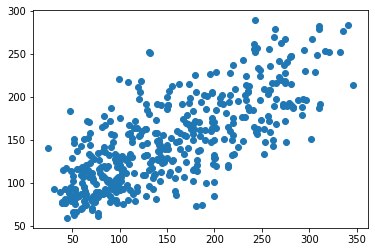

In [ ]:
clf = GridSearchCV(pipeline, {'model__n_neighbors': [1,2,3,4,5,7,8]}, cv=6)
clf.fit(X,y)
y_predict = clf.predict(X)

plt.scatter(y,y_predict)
DataFrame(clf.cv_results_)

## PreProcessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, make_scorer

In [ ]:
 print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X,y = load_iris(return_X_y=True)
X_norm = StandardScaler().fit_transform(X)
X_norm[:,0].std()

1.0